## Notebook Content

In this notebook, we will clean the data combined from both datasets __Trader Joe's__ , and __Sprouts__.

## Import Libraries

In [81]:
import pandas as pd 
import sqlite3 as sql
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Read Data from SQL

In [82]:
spouts_connection= sql.connect('Cleaned_Sprouts_df.db')
df_spouts = pd.read_sql('SELECT * FROM Cleaned_Sprouts_df', spouts_connection)

In [83]:
trader_connection= sql.connect('Cleaned_TraderJoes_df.db')
df_trader = pd.read_sql('SELECT * FROM Cleaned_TraderJoes_df', trader_connection)

### Drop Index Column

In [84]:
#drop index column because we want to combine 2 datasets
df_spouts.drop('index', axis=1, inplace=True)

In [85]:
df_trader.drop('index', axis=1, inplace=True)

### Explore Data

In [86]:
df_trader.head()

,URL,CALORY,TOTAL_FAT,SATURATED_FAT,TRANS_FAT,CHOLESTEROL,SODIUM,TOTAL_CARBOHYDRATE,PROTEIN,VITAMIN_D,CALCIUM,IRON,POTASSIUM,FIBER,POLYUNSATURATED_FAT,MONOUNSATURATED_FAT,SUGARS
0,https://www.traderjoes.com/home/products/pdp/0...,160,5.0,0.0,0.0,20.0,370.0,24.0,4.0,0.0,156.0,2.0,47.0,0.0,0.0,0.0,5.0
1,https://www.traderjoes.com/home/products/pdp/0...,120,2.0,0.0,0.0,0.0,420.0,20.0,4.0,0.0,20.0,2.0,70.0,0.0,0.0,0.0,2.0
2,https://www.traderjoes.com/home/products/pdp/0...,70,4.5,2.5,0.0,10.0,600.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,https://www.traderjoes.com/home/products/pdp/0...,170,10.0,7.0,0.0,20.0,220.0,18.0,3.0,0.0,10.0,0.2,0.0,1.0,0.0,0.0,1.0
4,https://www.traderjoes.com/home/products/pdp/0...,120,8.0,4.5,0.0,25.0,150.0,11.0,2.0,0.1,10.0,0.2,20.0,0.0,0.0,0.0,0.0


In [87]:
df_spouts.head()

,URL,CALORY,TOTAL_FAT,SATURATED_FAT,TRANS_FAT,CHOLESTEROL,SODIUM,TOTAL_CARBOHYDRATE,PROTEIN,VITAMIN_D,CALCIUM,IRON,POTASSIUM,SUGARS,FIBER
0,https://shop.sprouts.com/shop/categories/133?p...,140,8.0,0.5,0.0,0.0,110.0,16.0,2.0,0.0,22.0,0.0,65.0,0.0,1.0
1,https://shop.sprouts.com/shop/categories/133?p...,150,9.0,1.5,0.0,0.0,120.0,16.0,2.0,0.0,6.0,0.0,450.0,0.0,1.0
2,https://shop.sprouts.com/shop/categories/133?p...,130,7.0,0.5,0.0,0.0,65.0,17.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
3,https://shop.sprouts.com/shop/categories/133?p...,140,7.0,0.5,0.0,0.0,120.0,16.0,2.0,0.0,23.0,0.0,65.0,0.0,1.0
4,https://shop.sprouts.com/shop/categories/133?p...,140,8.0,1.0,0.0,0.0,200.0,17.0,2.0,0.0,5.0,0.4,380.0,1.0,1.0


### Concat Datasets 

In [88]:
all_df= pd.concat([df_spouts,df_trader],ignore_index=True)

### Explore Data After Combination 

In [89]:
all_df.head()

,URL,CALORY,TOTAL_FAT,SATURATED_FAT,TRANS_FAT,CHOLESTEROL,SODIUM,TOTAL_CARBOHYDRATE,PROTEIN,VITAMIN_D,CALCIUM,IRON,POTASSIUM,SUGARS,FIBER,POLYUNSATURATED_FAT,MONOUNSATURATED_FAT
0,https://shop.sprouts.com/shop/categories/133?p...,140,8.0,0.5,0.0,0.0,110.0,16.0,2.0,0.0,22.0,0.0,65.0,0.0,1.0,NaN,NaN
1,https://shop.sprouts.com/shop/categories/133?p...,150,9.0,1.5,0.0,0.0,120.0,16.0,2.0,0.0,6.0,0.0,450.0,0.0,1.0,NaN,NaN
2,https://shop.sprouts.com/shop/categories/133?p...,130,7.0,0.5,0.0,0.0,65.0,17.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN
3,https://shop.sprouts.com/shop/categories/133?p...,140,7.0,0.5,0.0,0.0,120.0,16.0,2.0,0.0,23.0,0.0,65.0,0.0,1.0,NaN,NaN
4,https://shop.sprouts.com/shop/categories/133?p...,140,8.0,1.0,0.0,0.0,200.0,17.0,2.0,0.0,5.0,0.4,380.0,1.0,1.0,NaN,NaN


In [90]:
all_df.tail()

,URL,CALORY,TOTAL_FAT,SATURATED_FAT,TRANS_FAT,CHOLESTEROL,SODIUM,TOTAL_CARBOHYDRATE,PROTEIN,VITAMIN_D,CALCIUM,IRON,POTASSIUM,SUGARS,FIBER,POLYUNSATURATED_FAT,MONOUNSATURATED_FAT
1715,https://www.traderjoes.com/home/products/pdp/0...,80,0.0,0.0,0.0,0.0,220.0,17.0,1.0,0.0,10.0,0.1,60.0,1.0,1.0,0.0,0.0
1716,https://www.traderjoes.com/home/products/pdp/0...,170,17.0,11.0,0.0,0.0,520.0,6.0,0.0,0.0,20.0,0.7,140.0,1.0,1.0,0.0,0.0
1717,https://www.traderjoes.com/home/products/pdp/0...,500,28.0,8.0,0.0,125.0,670.0,22.0,24.0,0.0,63.0,0.0,141.0,49.0,2.0,0.0,0.0
1718,https://www.traderjoes.com/home/products/pdp/0...,120,7.0,0.5,0.0,0.0,25.0,11.0,3.0,0.0,20.0,2.4,210.0,8.0,1.0,0.0,0.0
1719,https://www.traderjoes.com/home/products/pdp/0...,25,1.5,1.0,0.0,0.0,220.0,1.0,1.0,0.0,40.0,1.4,40.0,0.0,1.0,0.0,0.0


In [91]:
all_df.sample(5)

,URL,CALORY,TOTAL_FAT,SATURATED_FAT,TRANS_FAT,CHOLESTEROL,SODIUM,TOTAL_CARBOHYDRATE,PROTEIN,VITAMIN_D,CALCIUM,IRON,POTASSIUM,SUGARS,FIBER,POLYUNSATURATED_FAT,MONOUNSATURATED_FAT
585,https://shop.sprouts.com/shop/categories/133?p...,70,0.5,0.0,0.0,25.0,400.0,6.0,9.0,0.0,0.0,0.0,0.0,4.0,0.0,NaN,NaN
1066,https://shop.sprouts.com/shop/categories/153?p...,90,0.0,0.0,0.0,0.0,20.0,24.0,1.0,0.0,0.0,0.0,0.0,40.0,0.0,NaN,NaN
460,https://shop.sprouts.com/shop/categories/133?p...,130,7.0,1.0,0.0,0.0,130.0,14.0,2.0,0.0,11.0,1.0,109.0,2.0,2.0,NaN,NaN
1435,https://www.traderjoes.com/home/products/pdp/0...,110,9.0,6.0,0.0,25.0,125.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1182,https://shop.sprouts.com/shop/categories/153?p...,190,1.5,0.0,0.0,10.0,370.0,31.0,14.0,0.0,0.0,0.0,0.0,9.0,4.0,NaN,NaN


In [92]:
all_df.shape

(1720, 17)

In [93]:
all_df.columns

Index(['URL', 'CALORY', 'TOTAL_FAT', 'SATURATED_FAT', 'TRANS_FAT',
       'CHOLESTEROL', 'SODIUM', 'TOTAL_CARBOHYDRATE', 'PROTEIN', 'VITAMIN_D',
       'CALCIUM', 'IRON', 'POTASSIUM', 'SUGARS', 'FIBER',
       'POLYUNSATURATED_FAT', 'MONOUNSATURATED_FAT'],
      dtype='object')

### Drop Columns 

In [94]:
# check collumns with large number of nulls 
all_df.isnull().sum().sort_values(ascending = False)

MONOUNSATURATED_FAT    1305
POLYUNSATURATED_FAT    1305
VITAMIN_D                 0
FIBER                     0
SUGARS                    0
POTASSIUM                 0
IRON                      0
CALCIUM                   0
URL                       0
CALORY                    0
TOTAL_CARBOHYDRATE        0
SODIUM                    0
CHOLESTEROL               0
TRANS_FAT                 0
SATURATED_FAT             0
TOTAL_FAT                 0
PROTEIN                   0
dtype: int64

In [95]:
# drop columns with nulls
all_df.drop(['MONOUNSATURATED_FAT','POLYUNSATURATED_FAT', 'URL'] , axis=1, inplace=True)

In [96]:
all_df.shape

(1720, 14)

### Save Data into CSV

In [97]:
all_df.to_csv('all_df.csv')

### Methods to Use Amoung File

In [101]:
# plot a bix plot for each column to discover outliers

columns_names= ['Calory', "Total Fat","Saturated Fat", "Trans Fat", "Cholesterol", "Sodium", "Total Carbohydrate",
               "Protein", "Vitamin D", "Calcium", "Iron", "Potassium", "Sugars", "Fiber"]
def plot_box(df, size):
    """
    This method will be called to plot a box plot for each column; to detect the outliers.  
    """
    plt.figure(figsize = [25,50])
    for i in range(1,size + 1):
        plt.subplot(5,3,i)
        sns.boxplot(data = df.iloc[:,i-1], color= '#9546A2')
        plt.title(columns_names[i-1], fontsize = 20)
    plt.savefig('Boxpolt_aft_outliers.png')

In [99]:
def fillna_mean(df):
    """
    This method will be called to fill the null values of each column with the mean value.
    """
    for col in df.columns:
        mean = np.mean(df[col])
        df[col].fillna(value=mean, inplace=True)

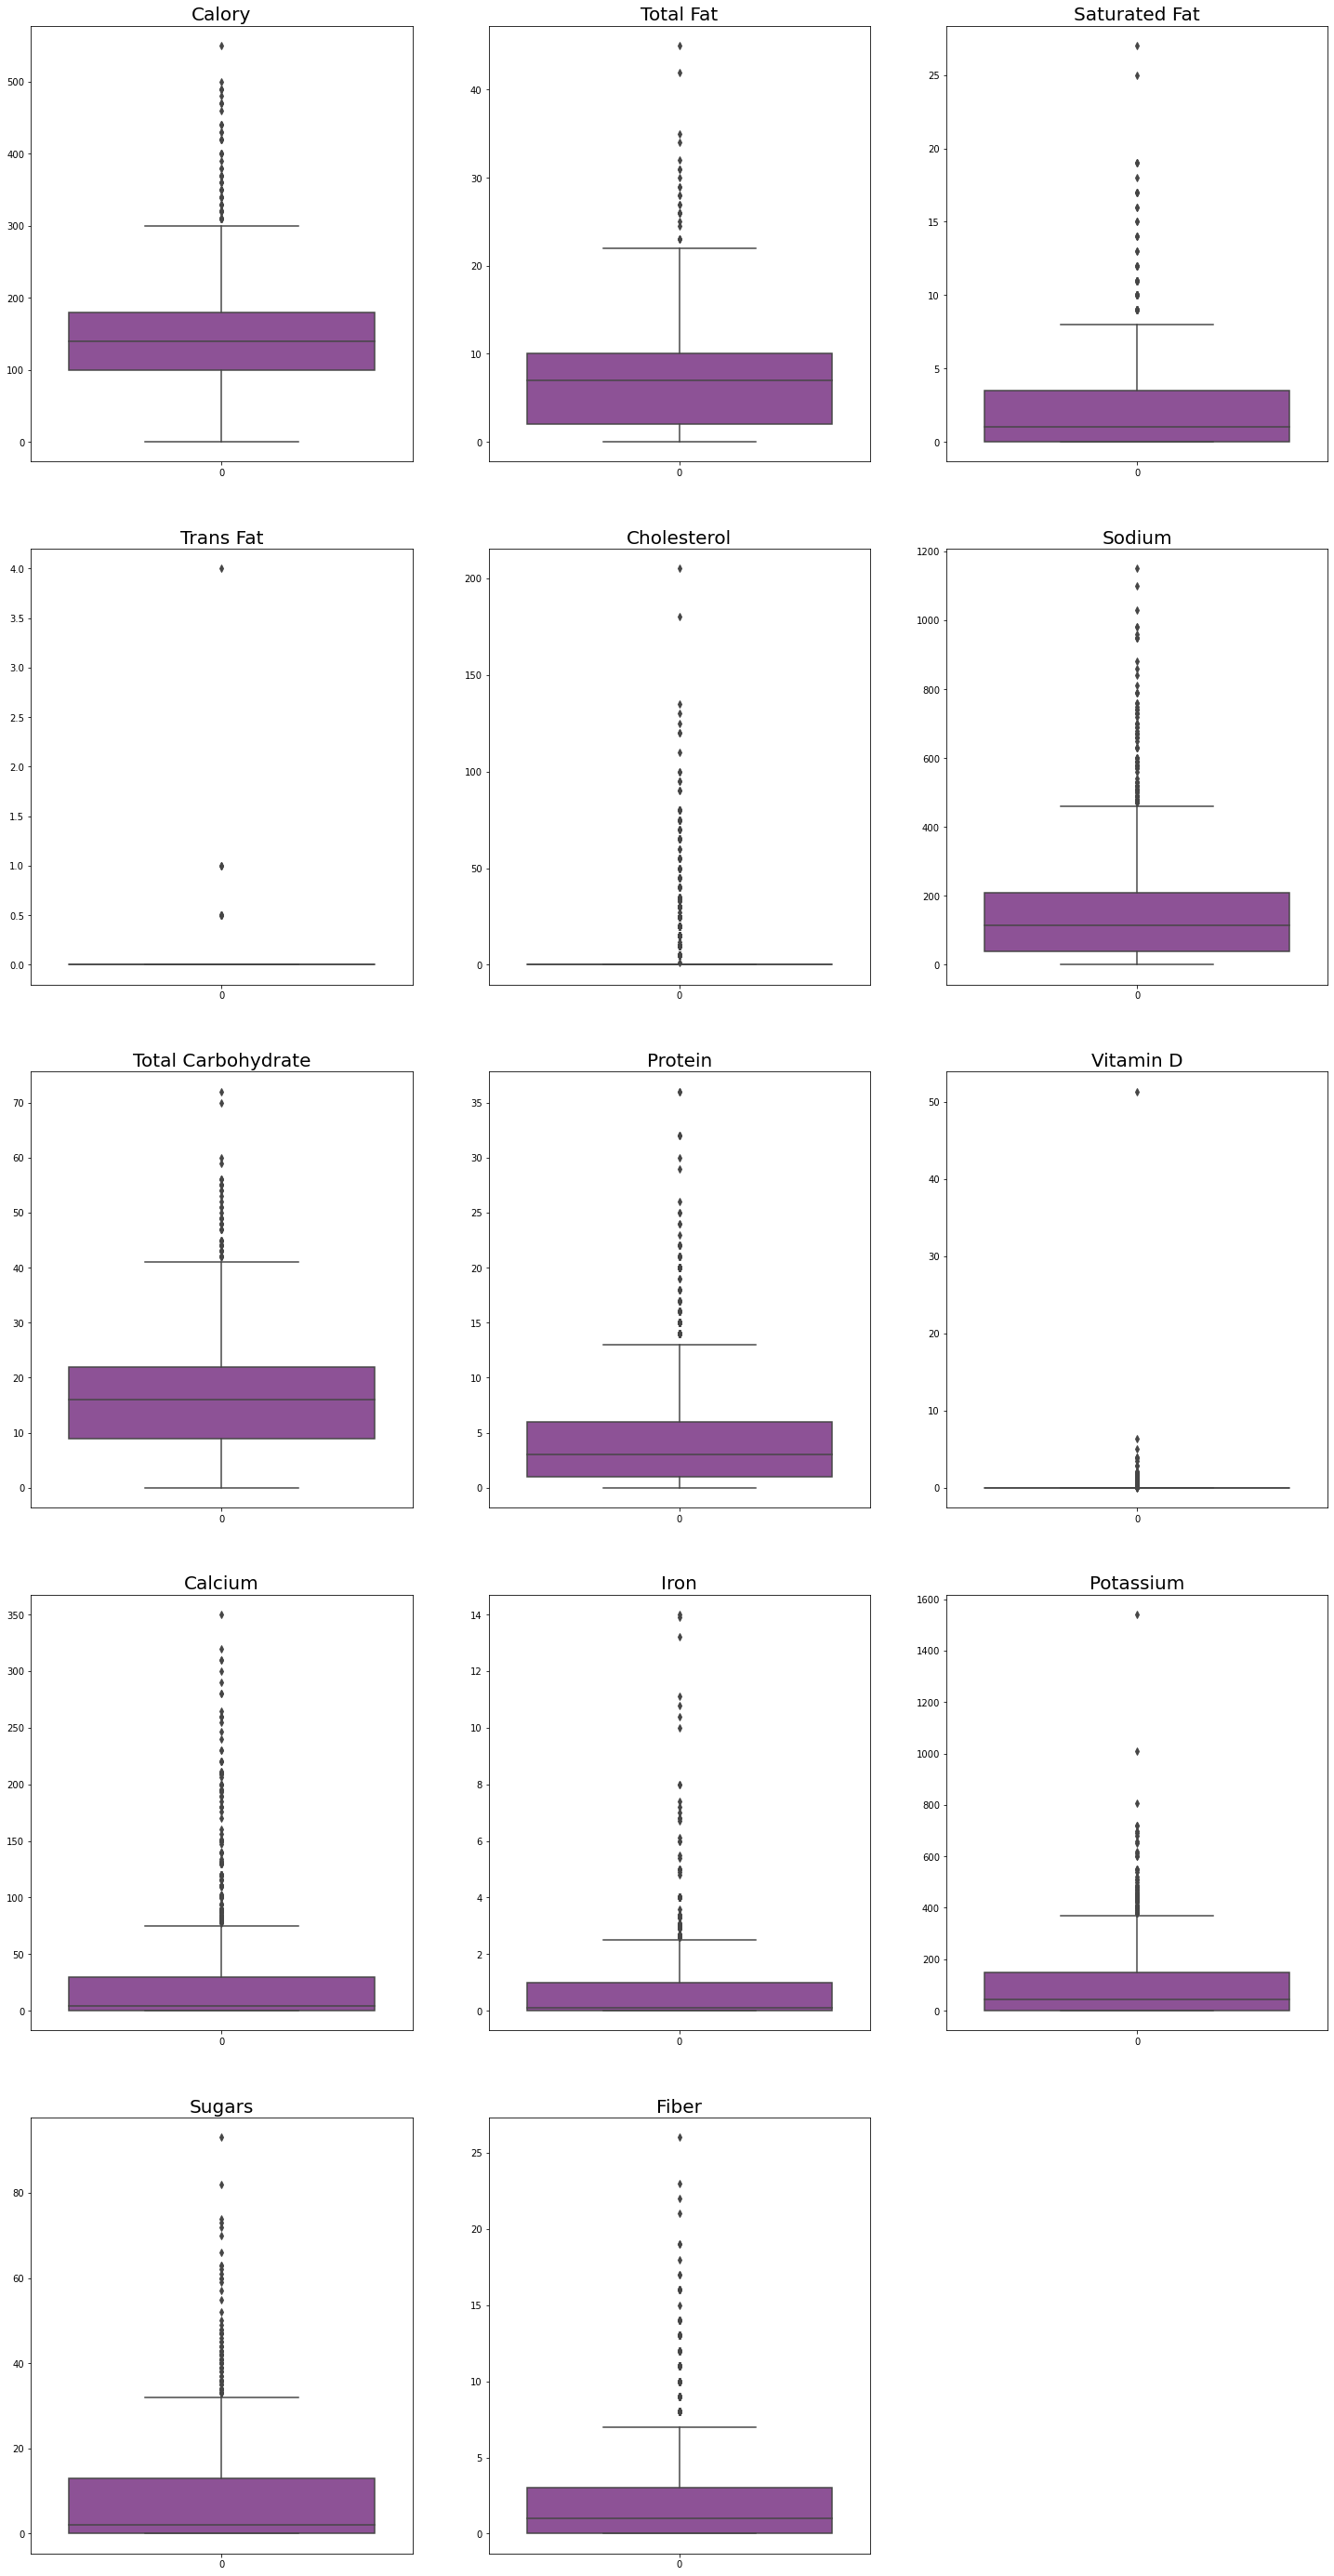

In [100]:
# call plot_box method
plot_box(all_df, all_df.shape[1])

As we see in the above box plot, there is a lot of outliers, so we must dealing with them.

### Detect Outliers

In [102]:
# detect the outliers using IQR 
Q1 = all_df[all_df.columns].quantile(q = 0.25)
Q3 = all_df[all_df.columns].quantile(q = 0.75)
IQR = Q3 - Q1

# store in the dataset only values <= the max value 
all_df = all_df[((all_df[all_df.columns] <= (Q3 + 1.5 * IQR)))]

From the above step, we got a lot of nulls after storing the values less than or equal to the maximum value, so we have to deal with nulls.

In [103]:
# calling the function to fill the null values.
fillna_mean(all_df)

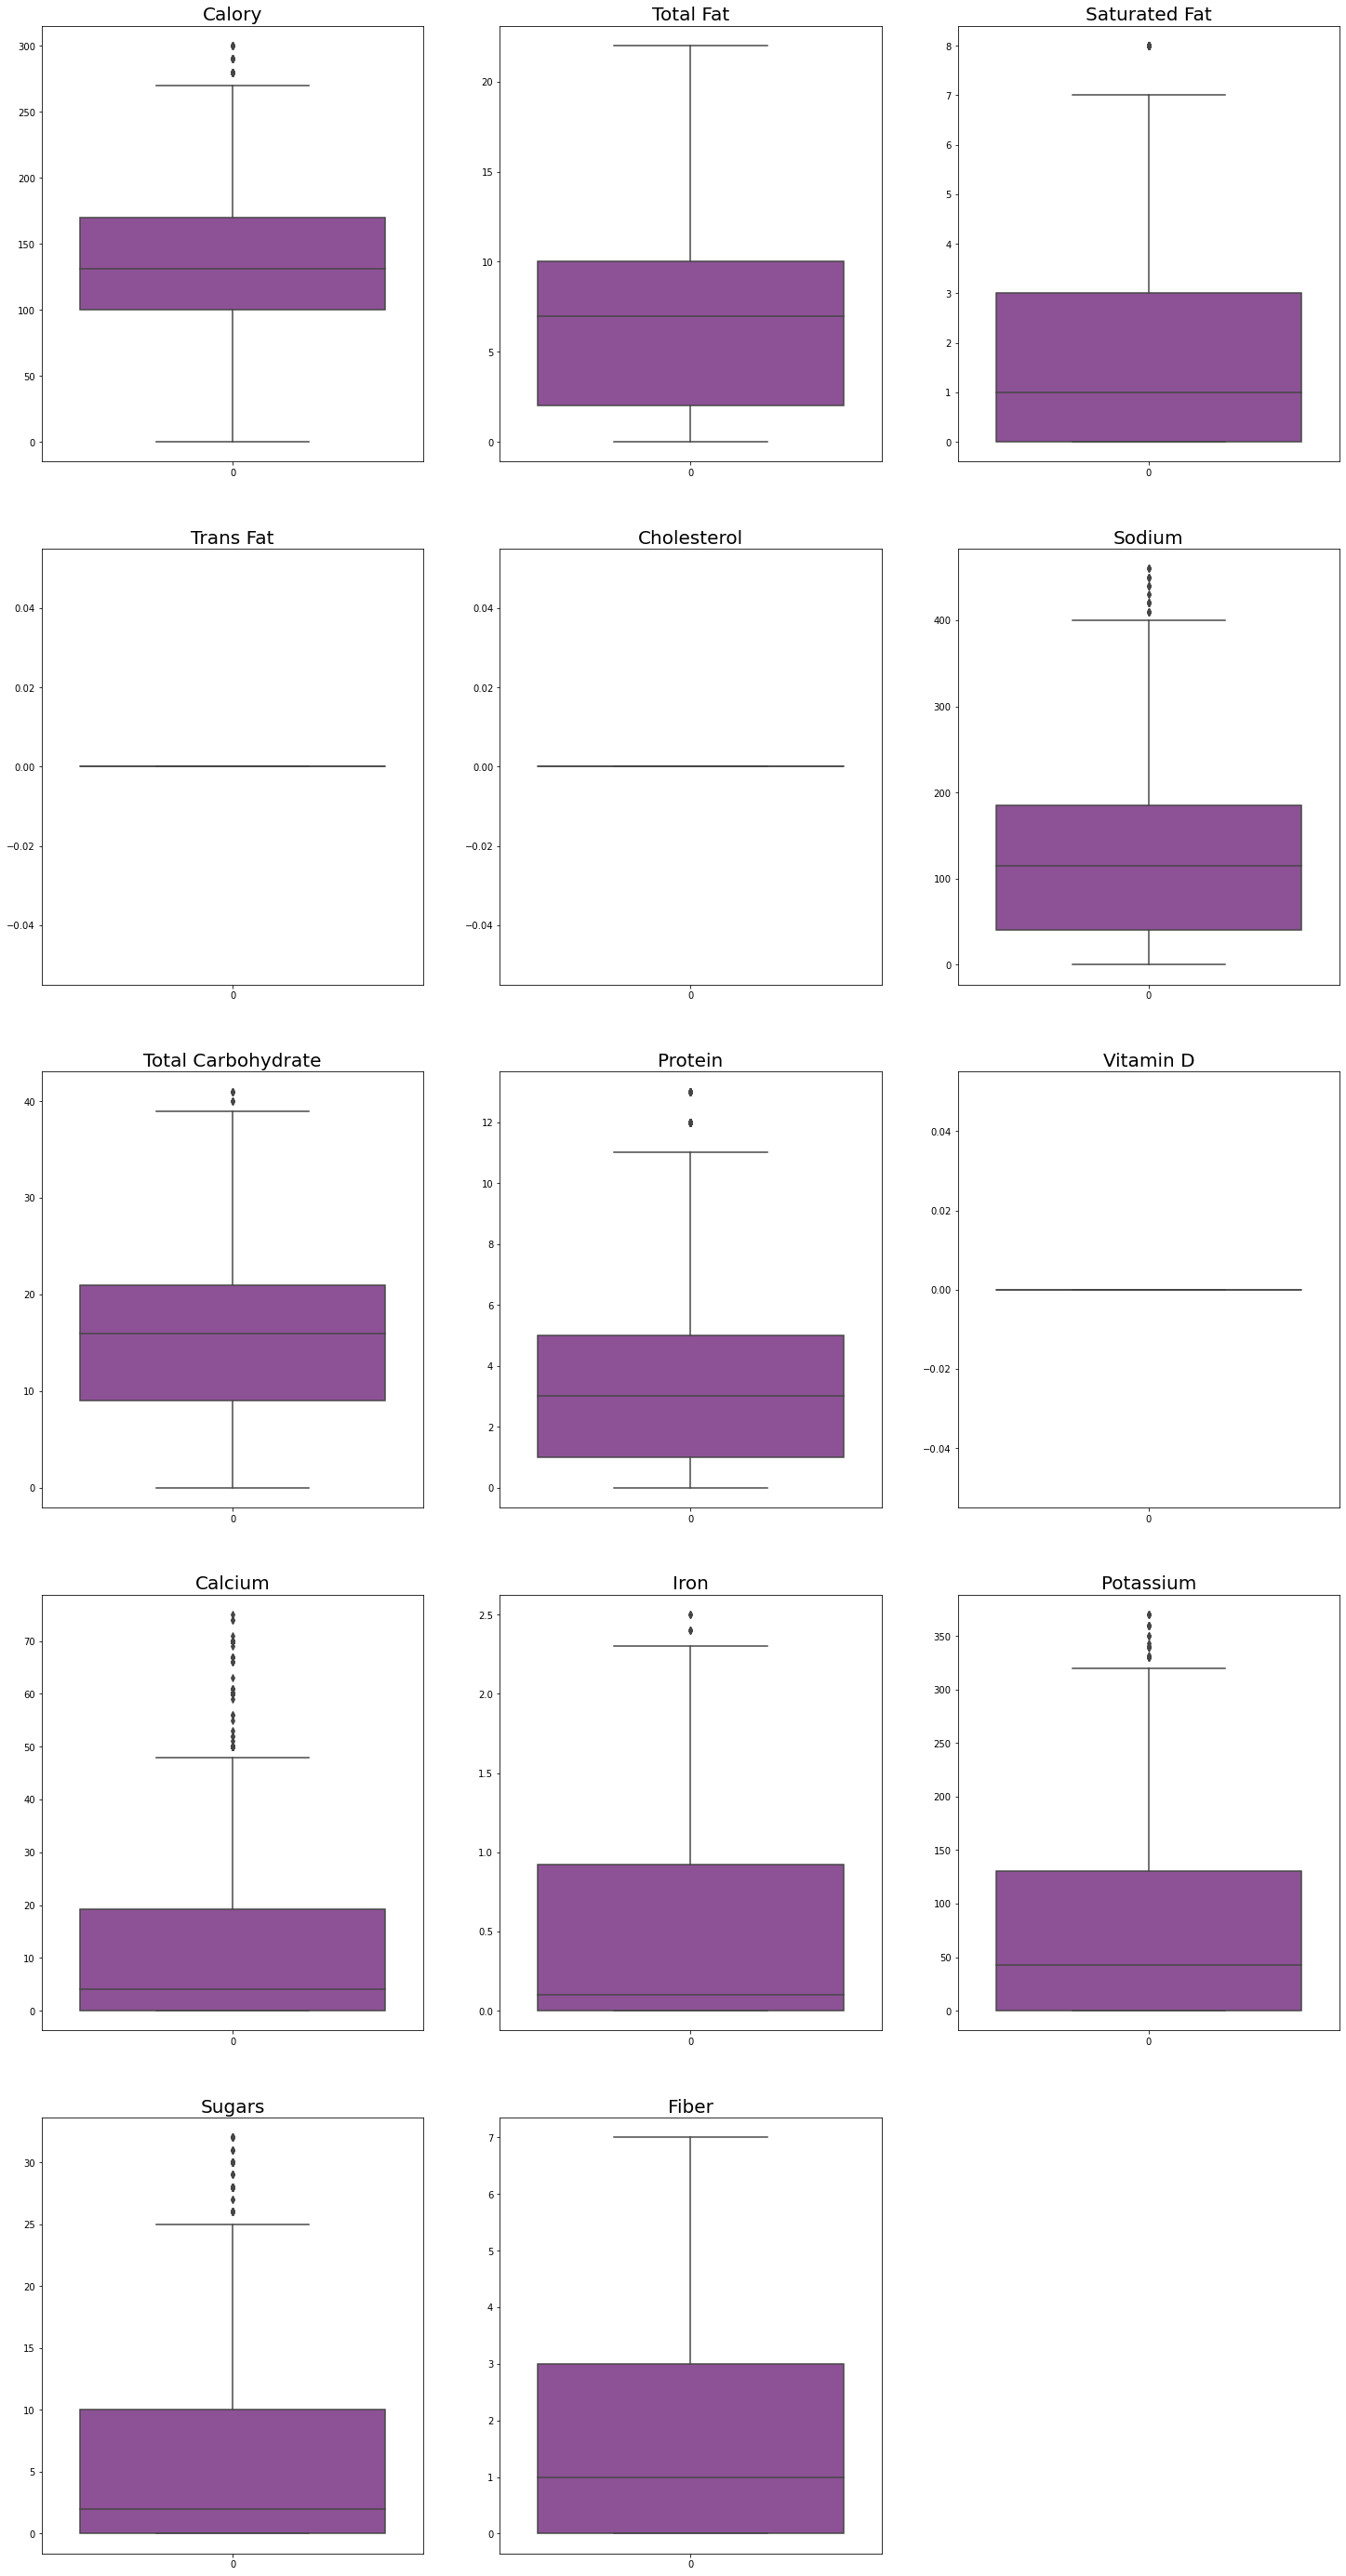

In [104]:
# draw a box plot after removing outliers.
plot_box(all_df, all_df.shape[1])

As we see, there are still a few outliers need to be fixed.

### Add Data to DataBase 

In [32]:
conn = sql.connect('Cleaned_df.db')

In [33]:
all_df.to_sql('Cleaned_df', conn)